# Data Wrangling Template

## Gather

In [112]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import re
import seaborn as sb
import matplotlib.pyplot as plt

In [113]:
#Create a dataframe from the Udacity supplied tweet CSV file for the WeRateDogs tweet data
df_raw = pd.read_csv("twitter-archive-enhanced.csv")
df_raw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [114]:
#Create a dataframe from the Udacity supplied tweet TSV file for the predictions data
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [115]:
#Create a list of dictionarys for all the tweets in the tweet-json.txt file for the raw twitter API JSON data for WeRateDogs
tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))
    
#Create a list of dictionaries from the tweets data with only the id, retweet_count & favorite_count data kept
tweet_stats = []
for i in range(len(tweets)):
    tweet_stats.append(dict((k, tweets[i][k]) for k in ['id', 'retweet_count', 'favorite_count'] if k in tweets[i]))

#Put the list of the tweets into a dataframe with the columns in a set order
tweet_stats_df = pd.DataFrame(tweet_stats)[['id', 'retweet_count', 'favorite_count']]
tweet_stats_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [116]:
##NOT USED DUE TO MOBILE VERIFICATION ISSUES##
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

## Assess

In [117]:
#Looks at the count and types for each of the columns in the main table
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [118]:
#Look at the general stats of the numerator and denominator columns
df_raw[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [119]:
#Check for duplicates
sum(df_raw.duplicated())

0

In [120]:
#Look at the p1 predictions column to see if there are any non-dogs listed
df_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
beagle                        18
teddy                         18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [121]:
#See the shape of each of the tables
df_raw.shape, df_predictions.shape, tweet_stats_df.shape

((2356, 17), (2075, 12), (2354, 3))

In [122]:
#See if there are any non-10 denominators
df_raw.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [123]:
#List the non-10 denominators
non_10 = [0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2]
df_raw.loc[df_raw['rating_denominator'].isin(non_10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [124]:
#Check to see if there are any other values in the columns for the nicknames
df_raw.doggo.unique(), df_raw.floofer.unique(), df_raw.pupper.unique(), df_raw.puppo.unique() 

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [125]:
#Check for tweets that don't have "https://twitter.com/dog_rates" in the URL.

URLs = df_raw.expanded_urls.dropna().unique()
URL_list = []
for i in range(len(URLs)):
    URL_list.append(URLs[i][:30])
np.unique(URL_list)

array(['http://goo.gl/ArWZfi,https://t', 'http://us.blastingnews.com/new',
       'http://www.gofundme.com/blueth', 'https://gofundme.com/ydvmve-su',
       'https://m.facebook.com/story.p', 'https://m.youtube.com/watch?v=',
       'https://twitter.com/4bonds2car', 'https://twitter.com/AaronChewn',
       'https://twitter.com/ChinoChina', 'https://twitter.com/EmilieGamb',
       'https://twitter.com/KennyFromD', 'https://twitter.com/KibaDva/st',
       'https://twitter.com/SchafeBaco', 'https://twitter.com/abc/status',
       'https://twitter.com/alexmartin', 'https://twitter.com/animalcog/',
       'https://twitter.com/badlandsnp', 'https://twitter.com/basic_vace',
       'https://twitter.com/bbcworld/s', 'https://twitter.com/brianstack',
       'https://twitter.com/bvuepd/sta', 'https://twitter.com/chpsanfran',
       'https://twitter.com/csncapital', 'https://twitter.com/deadspin/s',
       'https://twitter.com/dog_rates/', 'https://twitter.com/dogratingr',
       'https://twitter.c

In [126]:
#A list of all tweets that don't start from dog_rates own twitter.
df_raw[df_raw['expanded_urls'].str.contains("dog_rates", na=False) == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,NaN,NaN,NaN,https://twitter.com/kaijohnson_19/status/88396...,13,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
101,872668790621863937,NaN,NaN,2017-06-08 04:17:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @loganamnosis: Penelope here is doing me qu...,8.726576e+17,1.547674e+08,2017-06-08 03:32:35 +0000,https://twitter.com/loganamnosis/status/872657...,14,10,None,None,None,None,None


In [127]:
#A list of retweets
df_raw[df_raw['text'].str.contains("RT", na=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dante. At first he wasn't a fan of his ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877316821...,13,10,Dante,None,None,None,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None


In [128]:
#View the data types and item counts of all the dataframes
df_raw.info(), df_predictions.info(), tweet_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

(None, None, None)

## Clean

#### Define

#### Quality issues   
Retweets are included and need to be removed.  
Some columns are not needed is not needed.  
Tweet_stats_df 'id' column needs to be 'tweet_id'.
Timestamp is not in timestamp form.   
Rating denominator not always /10 some need to be nominlised.  
Rating numerator not always the correct value and need to be fixed.  
Some items in predicted dataframe are not dogs.  
Only the p1 prediction will be necessary for the project as this has the highest prediction rate - p2, p3 to drop.  
Some tweets are a reply and have no rating.  


#### Tidyness issues
Doggo floofer etc, only need to be one column.      
Only need to be one table.

#### Code

In [129]:
#Remove unneed columns in the udacity supplied data
df_raw_clean = df_raw.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
df_raw_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [130]:
#Remove unneed columns in the predictions data
df_predictions_clean = df_predictions.drop(['img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)
df_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True


In [131]:
#Create a list of the nicknames give into one list
dog_list = []
for i in range(len(df_raw)):
    if df_raw_clean.floofer[i] == "floofer":
        dog_list.append("floofer")
    elif df_raw_clean.doggo[i] == "doggo":
        dog_list.append("doggo")
    elif df_raw_clean.pupper[i] == "pupper":
        dog_list.append("pupper")
    elif df_raw_clean.puppo[i] == "puppo":
        dog_list.append("puppo")
    else:
        dog_list.append("None")

#Add the list to the dataframe and remove the single nickname columns
df_raw_clean['nickname']=dog_list
df_raw_clean = df_raw_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)
df_raw_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,nickname
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [132]:
#Rename the column from 'id' to 'tweet_id'
df_tweet_stats_clean = tweet_stats_df.rename(columns={'id':'tweet_id'})
df_tweet_stats_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [133]:
#A list of all non-dog items in the predictions p1 column
non_dog = ['redbone', 'Rhodesian_ridgeback', 'box_turtle', 'shopping_cart', 'Lhasa', 'hen', 'desktop_computer', 'three-toed_sloth', 'ox', 'guinea_pig', 'coho', 'Pembroke', 'llama', 'seat_belt', 'snail',
'Airedale', 'triceratops', 'swab', 'hay', 'hyena', 'jigsaw_puzzle', 'vizsla', 'vacuum', 'teddy', 'papillon', 'porcupine', 'goose', 'borzoi', 'hare', 'electric_fan', 'web_site',
'ibex', 'fire_engine', 'lorikeet', 'toyshop', 'common_iguana', 'frilled_lizard', 'leatherback_turtle', 'hamster', 'Angora', 'Arctic_fox', 'trombone', 'canoe', 'king_penguin', 'shopping_basket',
'bearskin', '', 'bustard', 'crash_helmet', 'ski_mask', 'shower_curtain', '', 'jellyfish', 'doormat', 'Arabian_camel', 'lynx', 'hog', 'comic_book', 'minivan', 'seashore', 'cuirass', 'candle',
'weasel', 'Christmas_stocking', 'washbasin', 'car_mirror', 'piggy_bank', 'pot', 'boathouse', 'mud_turtle', 'cairn', 'platypus', 'ping-pong_ball', 'sea_urchin', 'bow_tie', 'window_shade',
"jack-o'-lantern", 'sorrel', 'peacock', 'axolotl', 'wool', 'banana', 'wood_rabbit', 'lacewing', 'dingo', 'brown_bear', 'scorpion', 'flamingo', 'microphone', 'pitcher', 'refrigerator', 'picket_fence', 
'tub', 'zebra', 'hermit_crab', 'swing', 'park_bench', 'feather_boa', 'Loafer', 'stone_wall', 'ice_bear', 'prayer_rug', 'chimpanzee', 'china_cabinet', 'bee_eater', 'tennis_ball', 'carton',
'killer_whale', 'ostrich', 'terrapin', 'Siamese_cat', 'gondola', 'Great_Pyrenees', 'microwave', 'starfish', 'sandbar', 'motor_scooter', 'ram', 'leaf_beetle', 'wombat', 'Newfoundland', 'water_bottle',
'suit', 'toilet_seat', '', 'robin', 'Cardigan', 'slug', 'toilet_tissue', 'acorn_squash', 'soccer_ball', 'African_crocodile', 'tick', 'ocarina', 'boxer', 'street_sign', 'bow', 'stove', 'paper_towel',
'upright', 'dough', 'bath_towel', 'walking_stick', 'bubble', 'book_jacket', 'rain_barrel', 'black-footed_ferret', 'guenon', 'water_buffalo', 'patio', 'cowboy_hat', 'dogsled', 'maze', 'harp', 'panpipe', 
'cash_machine', 'mailbox', 'wallaby', 'earthstar', 'pillow', 'bluetick', 'space_heater', 'carousel', 'birdhouse', 'snorkel', 'bald_eagle', 'koala', 'Leonberg', 'cheetah', 'minibus', 'Weimaraner', 'clog',
'dishwasher', 'white_wolf', 'sliding_door', 'damselfly', 'cheeseburger', 'fiddler_crab', 'bannister', 'crane', 'snowmobile', 'badger', 'bighorn', 'geyser', 'barrow', 'bison', 'ice_lolly', 'sea_lion', 
'dining_table', 'beaver', 'Appenzeller', 'grey_fox', 'mousetrap', 'hippopotamus', 'hummingbird', 'tailed_frog', 'otter', 'Egyptian_cat', 'four-poster', 'wild_boar', 'bathtub', 'agama', 'muzzle', 
'hotdog', 'bib', 'espresso', 'timber_wolf', 'meerkat', 'nail', 'hammer', 'home_theater', 'alp', 'bonnet', 'handkerchief', 'hand_blower', 'polecat', 'lakeside', 'studio_couch', 'cup', 'cliff', 'lawn_mower',
'balloon', 'sunglasses', 'rapeseed', 'traffic_light', 'coil', 'binoculars', 'paddle', 'tiger_shark', 'sulphur-crested_cockatoo', 'American_black_bear', 'rotisserie', 'skunk', 'bookshop', 'radio_telescope',
'cougar', 'African_grey', 'coral_reef', 'lion', 'Madagascar_cat', 'tabby', 'silky_terrier', 'giant_panda', 'long-horned_beetle', 'clumber', 'sundial', 'padlock', 'pool_table', 'quilt', 'beach_wagon', 
'remote_control', 'bakery', 'pedestal', 'gas_pump', 'bookcase', 'shield', 'loupe', 'restaurant', 'prison', 'school_bus', 'cowboy_boot', 'jersey', 'wooden_spoon', 'leopard', 'mortarboard', 'teapot',
'military_uniform', 'washer', 'coffee_mug', 'fountain', 'pencil_box', 'barbell', 'grille', 'revolver', 'envelope', 'syringe', 'marmot', 'pole', 'laptop', 'basketball', 'tricycle', 'convertible', 
'limousine', 'orange']
#Subset the non-dog items out 
df_predictions_clean=df_predictions_clean.loc[df_predictions_clean['p1'].isin(non_dog)==False]

In [134]:
#Merge the 3 tables into 1 table
df_clean1 = pd.merge(df_raw_clean, df_predictions_clean, on='tweet_id', how='outer')
df_clean = pd.merge(df_clean1, df_tweet_stats_clean, on='tweet_id', how='outer')

In [135]:
#Remove rewteets from the table
df_clean = df_clean[df_raw['text'].str.contains("RT", na=False) == False]

In [136]:
#Convert timestamp column to timestamp and retweet count & favourite count to integer
df_clean['timestamp']=pd.to_datetime(df_clean.timestamp)
df_clean['retweet_count']=pd.to_numeric(df_clean.retweet_count, downcast="integer")
df_clean['favorite_count']=pd.to_numeric(df_clean.favorite_count, downcast="integer")

In [137]:
#List all the non-10 denominator values and list each ones text to see what the value should be
non_10_values = [0,15,70,7,150,11,170,20,50,90,80,40,130,110,16,120,2]
non_10 = df_clean.loc[df_clean['rating_denominator'].isin(non_10_values)]
for i in non_10.tweet_id:
    print ([i], list(non_10[non_10.tweet_id==i].text))

[835246439529840640] ["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"]
[832088576586297345] ['@docmisterio account started on 11/15/15']
[820690176645140481] ['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd']
[810984652412424192] ['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx']
[758467244762497024] ['Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE']
[740373189193256964] ['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ']
[731156023742988288] ['Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv']
[722974582966214656] ['Happy 4/20 from the squad! 13/10 for all https://t

In [138]:
#Tweets that have the wrong denominator/numerator 
#Some of which were groups of dogs so the score has been nomilised to /10
df_clean.loc[df_clean.tweet_id == 835246439529840640, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 835246439529840640, 'rating_numerator'] = 13

df_clean.loc[df_clean.tweet_id == 820690176645140481, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 820690176645140481, 'rating_numerator'] = 12

df_clean.loc[df_clean.tweet_id == 758467244762497024, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 758467244762497024, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 740373189193256964, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 740373189193256964, 'rating_numerator'] = 14

df_clean.loc[df_clean.tweet_id == 697463031882764288, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 697463031882764288, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 731156023742988288, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 731156023742988288, 'rating_numerator'] = 12

df_clean.loc[df_clean.tweet_id == 716439118184652801, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 716439118184652801, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 713900603437621249, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 713900603437621249, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 710658690886586372, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 710658690886586372, 'rating_numerator'] = 10

df_clean.loc[df_clean.tweet_id == 709198395643068416, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 709198395643068416, 'rating_numerator'] = 9

df_clean.loc[df_clean.tweet_id == 704054845121142784, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 704054845121142784, 'rating_numerator'] = 12

df_clean.loc[df_clean.tweet_id == 684225744407494656, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 684225744407494656, 'rating_numerator'] = 13

df_clean.loc[df_clean.tweet_id == 684222868335505415, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 684222868335505415, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 677716515794329600, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 677716515794329600, 'rating_numerator'] = 12

df_clean.loc[df_clean.tweet_id == 675853064436391936, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 675853064436391936, 'rating_numerator'] = 11

df_clean.loc[df_clean.tweet_id == 666287406224695296, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 666287406224695296, 'rating_numerator'] = 9

df_clean.loc[df_clean.tweet_id == 682962037429899265, 'rating_denominator'] = 10
df_clean.loc[df_clean.tweet_id == 682962037429899265, 'rating_numerator'] = 10

In [139]:
#Tweets that are not rating dogs
delete = [832088576586297345, 810984652412424192, 722974582966214656, 686035780142297088, 682808988178739200]
df_clean.drop(df_clean.loc[df_clean['tweet_id'].isin(delete)].index, inplace=True)

#### Test

In [140]:
#Check the look of the clean table
df_clean.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,nickname,jpg_url,p1,p1_conf,p1_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,NaN,NaN,NaN,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,9774,41048


In [141]:
#Check the types and counts of the clean table
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2159 non-null int64
timestamp             2159 non-null datetime64[ns]
text                  2159 non-null object
expanded_urls         2104 non-null object
rating_numerator      2159 non-null int64
rating_denominator    2159 non-null int64
name                  2159 non-null object
nickname              2159 non-null object
jpg_url               1266 non-null object
p1                    1266 non-null object
p1_conf               1266 non-null float64
p1_dog                1266 non-null object
retweet_count         2159 non-null int32
favorite_count        2159 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(2), int64(3), object(7)
memory usage: 236.1+ KB


#### Analysis

For this part of the investigation I wanted to see what breeds of dogs got the most retweets or favourites.  
Using the data supplied from Udacity's dog prediction algorithm I want to know if there is any significant breed that gets the most retweets or favourites. I also want to see if there is any difference in the retweets and favourites or do they both follow the same trend.

In [142]:
#A list of the breeds from the p1 column with 'nan' removed. 
dogs = ['Chihuahua', 'basset', 'Chesapeake_Bay_retriever', 'Pomeranian', 'Irish_terrier', 'Samoyed', 'French_bulldog',
'golden_retriever', 'whippet', 'Siberian_husky', 'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel', 'malamute',
'Italian_greyhound', 'chow', 'German_shepherd', 'Doberman', 'Eskimo_dog', 'Labrador_retriever', 'Saluki', 'tusker',
'miniature_pinscher', 'German_short-haired_pointer', 'English_springer', 'bloodhound', 'Bernese_mountain_dog',
'West_Highland_white_terrier', 'cocker_spaniel', 'flat-coated_retriever', 'Shetland_sheepdog', 'komondor', 'kelpie',
'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff', 'Staffordshire_bullterrier', 'Lakeland_terrier',
'Australian_terrier', 'Bedlington_terrier', 'Boston_bull', 'Old_English_sheepdog', 'black-and-tan_coonhound', 'Great_Dane',
'Yorkshire_terrier', 'schipperke', 'giant_schnauzer', 'Dandie_Dinmont', 'Irish_water_spaniel', 'Afghan_hound',
'Brittany_spaniel', 'Border_terrier', 'Norwegian_elkhound', 'American_Staffordshire_terrier', 'Rottweiler', 'Pekinese',
'briard', 'toy_poodle', 'collie', 'English_setter', 'malinois', 'Irish_setter', 'Gordon_setter', 'standard_poodle',
'miniature_schnauzer', 'curly-coated_retriever', 'Tibetan_mastiff', 'dalmatian', 'miniature_poodle', 'beagle', 'toy_terrier',
'Norwich_terrier', 'Norfolk_terrier', 'wire-haired_fox_terrier', 'Saint_Bernard', 'Walker_hound', 'maillot', 'basenji', 'keeshond',
'Welsh_springer_spaniel', 'Sussex_spaniel', 'conch', 'Shih-Tzu', 'Tibetan_terrier', 'Maltese_dog', 'soft-coated_wheaten_terrier',
'groenendael', 'Scottish_deerhound', 'Scotch_terrier', 'Ibizan_hound', 'EntleBucher', 'Japanese_spaniel',
'standard_schnauzer', 'Brabancon_griffon', 'African_hunting_dog', 'dhole']

#Count the total number of retweets and favourites and create tables for each 
dog_retweet_dict = {}
dog_fav_dict = {}
dog_types = df_clean.loc[df_clean['p1'].isin(dogs)]
for i in dogs:
    dog_retweet_dict[i] = dog_types.query('p1 == "{}"'.format(i)).retweet_count.sum()
    dog_fav_dict[i] = dog_types.query('p1 == "{}"'.format(i)).favorite_count.sum()
df_retweets = pd.DataFrame(list(dog_retweet_dict.items()), columns=['breed', 'retweet_count']).sort_values(by=['retweet_count'],ascending=False)
df_fav = pd.DataFrame(list(dog_fav_dict.items()), columns=['breed', 'favorite_count']).sort_values(by=['favorite_count'],ascending=False)


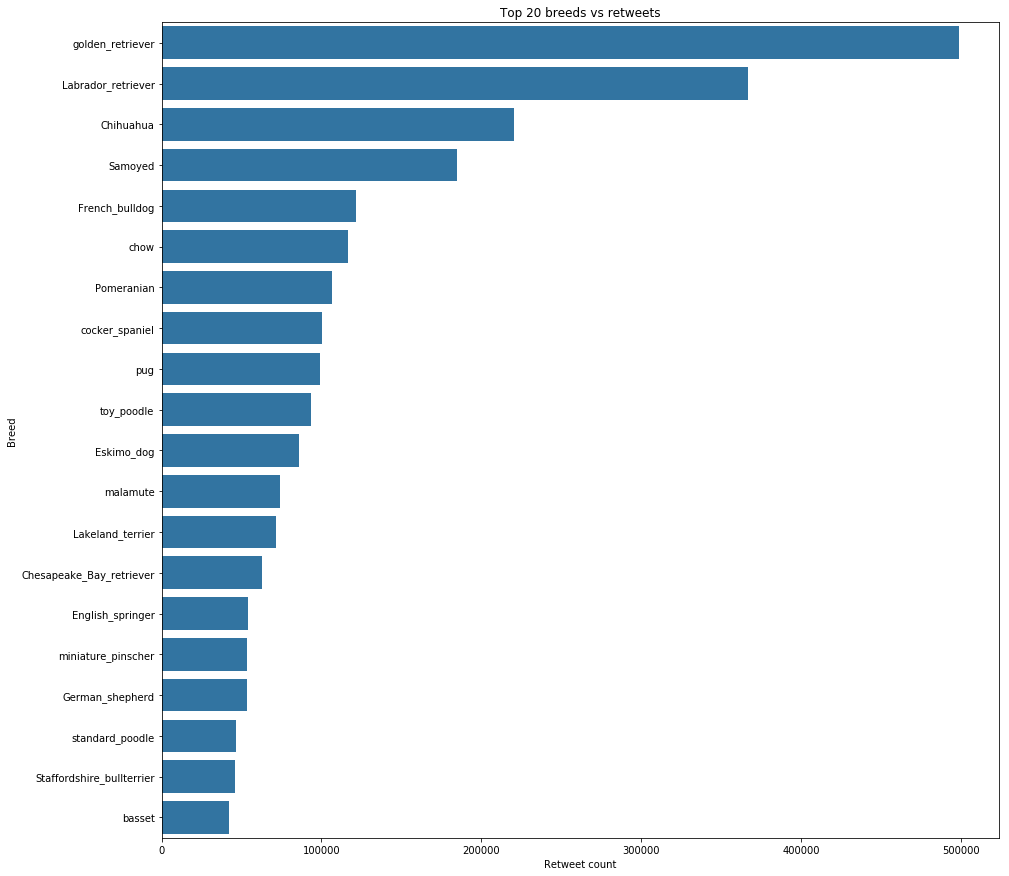

In [143]:
#Graph the top 20 breeds aginst retweets
base_color = sb.color_palette()[0]
plt.figure(figsize=(15, 15))
sb.barplot(x= df_retweets.head(20).retweet_count, y=df_retweets.head(20).breed, color = base_color)
plt.xlabel("Retweet count")
plt.ylabel("Breed")
plt.title("Top 20 breeds vs retweets");

The top 4 breeds have a distinct greater number of retweets from the number 5 position. Below french bulldog there is a somewhat gradual drop with almost not great drops between 2 breeds. 

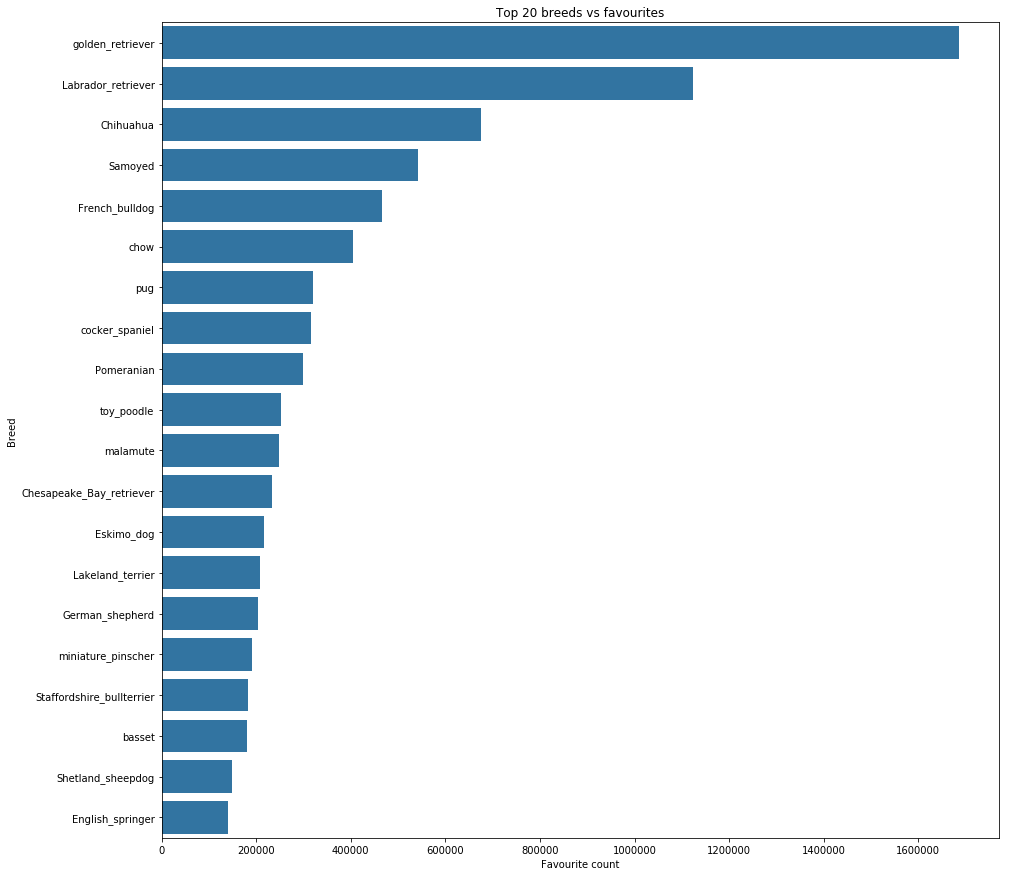

In [144]:
#Graph the top 20 breeds aginst retweets
base_color = sb.color_palette()[0]
plt.figure(figsize=(15, 15))
sb.barplot(x= df_fav.head(20).favorite_count, y=df_fav.head(20).breed, color = base_color)
plt.xlabel("Favourite count")
plt.ylabel("Breed")
plt.title("Top 20 breeds vs favourites");

Similar to the retweet graph there is a large drop between breeds, but in this graph it is between the top 3. From the Samoyed breed, the decline in favourites appears to be somewhat constant.

In both graphs, the top 6 breeds are the same; Golden retriever, Labrador retriever, Chihuahua, Samoyed, French bulldog and Chow. From the 7th position, the order on which the breeds appears differes between graphs. I am not sure as to why this could be. Between the 2 graphs some breeds are close being 2 positions away, while another breed can have up to a difference of 5 places. 

Regardless of the amount of likes and dislikes a certian type of breed gets, it is certian that they are all good dogs.